In [26]:
#import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df["Heart Disease"].value_counts(normalize=True)

Absence     0.555556
Presence    0.444444
Name: Heart Disease, dtype: float64

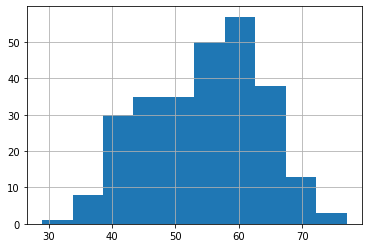

In [6]:
df["Age"].hist();

In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


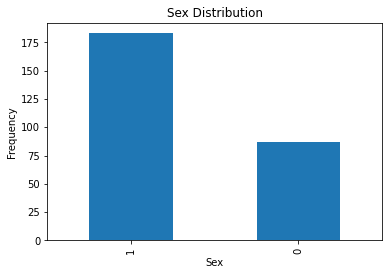

In [8]:
df["Sex"].value_counts().plot(kind="bar")
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Frequency");

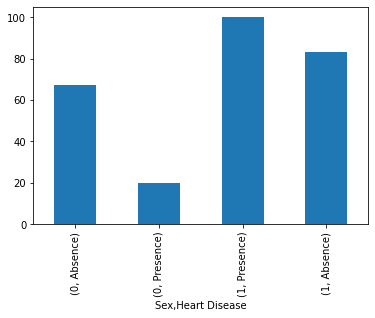

In [9]:
heart_disease_counts_by_sex = df.groupby("Sex")["Heart Disease"].value_counts()
heart_disease_counts_by_sex.plot(kind="bar", stacked=True);

In [10]:
X=df.drop(columns="Heart Disease")
y=df["Heart Disease"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print("X_train_shape:",X_train.shape)
print("X_test_shape:",X_test.shape)
print("y_train_shape:",y_train.shape)
print("y_test_shape:",y_test.shape)

X_train_shape: (216, 13)
X_test_shape: (54, 13)
y_train_shape: (216,)
y_test_shape: (54,)


In [13]:
random_over=RandomOverSampler(random_state=42)
X_train_over,y_train_over=random_over.fit_resample(X_train,y_train)

In [14]:
X_train_over

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,49,0,2,134,271,0,0,162,0,0.0,2,0,3
1,59,1,4,170,326,0,2,140,1,3.4,3,0,7
2,53,1,3,130,246,1,2,173,0,0.0,1,3,3
3,50,1,3,140,233,0,0,163,0,0.6,2,1,7
4,54,0,3,110,214,0,0,158,0,1.6,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,59,1,4,140,177,0,0,162,1,0.0,1,1,7
230,55,1,4,140,217,0,0,111,1,5.6,3,0,7
231,50,1,3,140,233,0,0,163,0,0.6,2,1,7
232,70,1,3,160,269,0,0,112,1,2.9,2,1,7


In [15]:
X_test_over,y_test_over=random_over.fit_resample(X_test,y_test)

In [16]:
X_test_over

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,57,1,3,128,229,0,2,150,0,0.4,2,1,7
1,46,1,4,120,249,0,2,144,0,0.8,1,0,7
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3
3,52,0,3,136,196,0,2,169,0,0.1,2,0,3
4,58,0,4,100,248,0,2,122,0,1.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,64,1,3,125,309,0,0,131,1,1.8,2,0,7
62,63,0,4,150,407,0,2,154,0,4.0,2,3,7
63,63,0,4,150,407,0,2,154,0,4.0,2,3,7
64,54,1,4,120,188,0,0,113,0,1.4,2,1,7


In [17]:
Base_line=df["Heart Disease"].value_counts(normalize=True).max()
round(Base_line,2)

0.56

In [18]:
clf = ExtraTreesClassifier(random_state=42)

In [19]:
cv=cross_val_score(clf,X_train_over,y_train_over,cv=5)
cv

array([0.76595745, 0.80851064, 0.85106383, 0.80851064, 0.89130435])

In [20]:
params={
    "n_estimators": range(20,100,20),
    "max_depth":range(2,5)
}

In [21]:
model_lr=GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [22]:
model_lr.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 5),
                         'n_estimators': range(20, 100, 20)},
             verbose=1)

In [23]:
results=pd.DataFrame(model_lr.cv_results_).sort_values("rank_test_score")
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.213697,0.008254,0.028886,0.006119,2,60,"{'max_depth': 2, 'n_estimators': 60}",0.787234,0.808511,0.872340,0.829787,0.826087,0.824792,0.028154,1
8,0.081611,0.009394,0.012766,0.002150,4,20,"{'max_depth': 4, 'n_estimators': 20}",0.787234,0.829787,0.914894,0.765957,0.804348,0.820444,0.051650,2
9,0.154652,0.010075,0.020768,0.003309,4,40,"{'max_depth': 4, 'n_estimators': 40}",0.808511,0.808511,0.914894,0.765957,0.804348,0.820444,0.049867,2
10,0.250085,0.016725,0.029795,0.004815,4,60,"{'max_depth': 4, 'n_estimators': 60}",0.787234,0.787234,0.914894,0.808511,0.804348,0.820444,0.048017,2
11,0.295354,0.015357,0.036655,0.006377,4,80,"{'max_depth': 4, 'n_estimators': 80}",0.787234,0.787234,0.914894,0.808511,0.804348,0.820444,0.048017,2


In [24]:
print(round(model_lr.score(X_train,y_train),2))
print(round(model_lr.score(X_test,y_test),2))
print(round(model_lr.score(X_train_over,y_train_over),2))
print(round(model_lr.score(X_test_over,y_test_over),2))

0.84
0.91
0.84
0.89


In [25]:
report=classification_report(y_test,model_lr.predict(X_test))
print(report)

              precision    recall  f1-score   support

     Absence       0.87      1.00      0.93        33
    Presence       1.00      0.76      0.86        21

    accuracy                           0.91        54
   macro avg       0.93      0.88      0.90        54
weighted avg       0.92      0.91      0.90        54

